In [3]:
from d2l import torch as d2l
import torch
from torch import nn

In [4]:
class Reshape(torch.nn.Module):
    def forward(self, x):
        return x.view(-1,784)

net = nn.Sequential(Reshape(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Reshape()
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

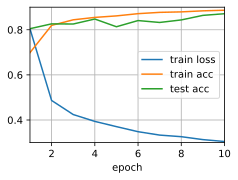

In [5]:
num_epochs, lr, batch_size = 10, 0.5, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [6]:
net2 = nn.Sequential(Reshape(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 64),
                    nn.ReLU(),
                    nn.Linear(64, 10))

net2.apply(init_weights)

Sequential(
  (0): Reshape()
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=10, bias=True)
)

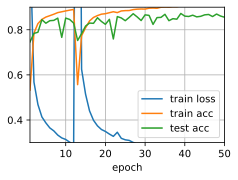

In [7]:
num_epochs, lr, batch_size = 50, 0.5, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net2.parameters(), lr=lr)
d2l.train_ch3(net2, train_iter, test_iter, loss, num_epochs, trainer)